In [1]:
import sys
sys.path.insert(0, "../../src")
from earthtext.api import osmencoderauto

# setup

- select a folder to hold model and data, `$OSMENCODER_FOLDER`

- copy into `$OSMENCODER_FOLDER` the following files
 
    - `s3://clay-text/models/osm_emcoder__embeddings_v1.0s2__trainedon_2024-05-10_16:22.ckpt`
    - `s3://clay-text/models/osm_emcoder__embeddings_v1.0s2__trainedon_2024-05-10_16:22.yaml`
    - `s3://clay-text/california-worldcover-chips/california-worldcover-chips-osm-multilabels_mod-prec70pc_emb-v1s2.parquet` 
    - `s3://clay-text/california-worldcover-chips/california-worldcover-chips-osm-multilabels_mod-prec70pc_emb-v1s2_embeddings_v1.0_meansstdevs.pkl`
 
- check that the property `metadata_file` on the `yaml` file points to the `parquet` file


# load and initialize helper object


In [2]:
model_ckpt_fname = '/opt/data/models/published/osm_emcoder__embeddings_v1.0s2__trainedon_2024-05-10_16:22.ckpt'
norm_constants_fname = '/opt/data/california-worldcover-chips/california-worldcover-chips-osm-multilabels_mod-prec70pc_emb-v1s2_embeddings_v1.0_meansstdevs.pkl'
osmenc = osmencoderauto.OSMEncoderWithAutocompletion(model_ckpt_fname, norm_constants_fname)
osmenc.setup()

2024-05-16 18:05:51.724 | INFO     | earthtext.api.osmencoderauto:__init__:31 - osmencoder model is /opt/data/models/published/osm_emcoder__embeddings_v1.0s2__trainedon_2024-05-10_16:22.ckpt
2024-05-16 18:05:51.725 | INFO     | earthtext.api.osmencoderauto:__init__:32 - autocompletion source is 'train'
2024-05-16 18:05:51.731 | INFO     | earthtext.api.osmencoderauto:setup:46 - loading model
2024-05-16 18:05:51.790 | INFO     | earthtext.api.osmencoderauto:setup:50 - initializing dataloaders
2024-05-16 18:05:52.862 | INFO     | earthtext.datamodules.components.chipmultilabel:__init__:93 - checking chip files for train split
100% (58690 of 58690) |##################| Elapsed Time: 0:00:02 Time:  0:00:020000
2024-05-16 18:05:55.054 | INFO     | earthtext.datamodules.components.chipmultilabel:__init__:97 - read train split with 58690 chip files (out of 58690)
2024-05-16 18:05:55.055 | INFO     | earthtext.datamodules.components.chipmultilabel:__init__:102 - max cache size is -1
2024-05-16

In [3]:
import pickle
with open(norm_constants_fname, "rb") as f:
    normalizer_constants = pickle.load(f)

In [4]:
osmenc.dataloader.normalizer.constants = normalizer_constants
osmenc.dataloader.normalizer.has_embeddings = True

In [11]:
osmenc.dataloader.normalizer.constants['means'].keys()

dict_keys(['osm_counts', 'osm_areas', 'osm_lengths', 'embeddings'])

In [3]:
osmenc.dataloader.test_dataset.normalizer.constants['means'].keys()

dict_keys(['osm_counts', 'osm_areas', 'osm_lengths', 'embeddings'])

In [4]:
self = osmenc

# make a query

In [5]:
min_counts, max_counts = {'sport=baseball':5 }, {'building=*': 0}
min_areas,  max_areas  = {}, {}

emb = osmenc.predict_embedding(min_counts, max_counts, min_areas, max_areas)
emb.shape

(768,)

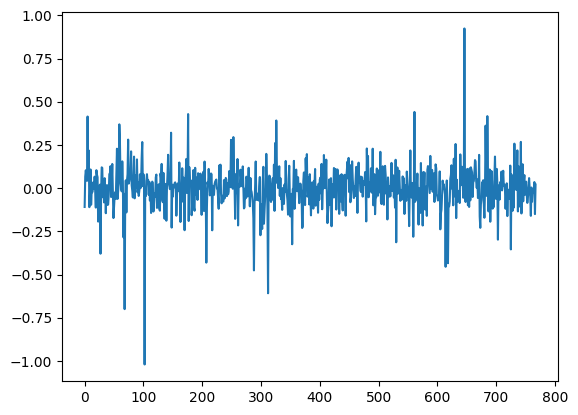

In [6]:
import matplotlib.pyplot as plt
plt.plot(emb)